In [44]:
from matplotlib import pyplot as plt
%matplotlib notebook
import struct
import math
import numpy as np

In [45]:
def plot_data(offx=0, end=-1, dtype='h', channels=1):
    with open('/tmp/scope_dump.bin', 'rb') as f:
        raw_data = f.read()
        data = struct.unpack(f'<{len(raw_data)//struct.calcsize(dtype)}{dtype}', raw_data)
    
    fig, axs = plt.subplots(channels, 1, squeeze=False, sharex=True, figsize=(10, 5))
    for i, ax in enumerate(axs.flatten()):
        ax.plot([math.nan if x==-255 else x for x in data[offx:][:end][i::channels]])
        ax.grid()
    
    return data[offx:]

<IPython.core.display.Javascript object>


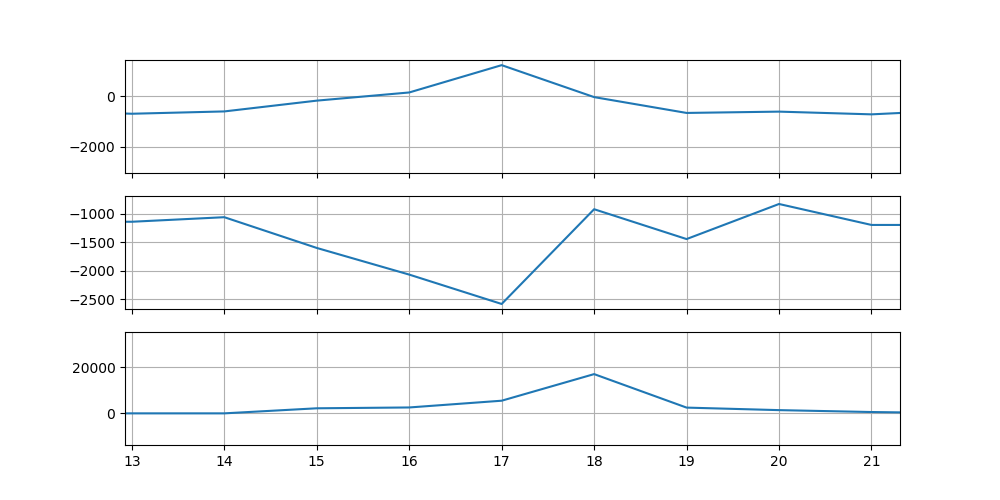

In [110]:
data = plot_data(offx=0, dtype='i', channels=3)
#print(''.join(str(x) for x in data[4:][3::4]))

In [106]:
import math
math.sqrt(statistics.mean(data[::3])), statistics.mean(data[::3])

(65535.99494457225, 4294966633.375)

In [81]:
plt.plot([x-42465024 for x in data])

In [87]:
(0x7fff/2)**2 / 8

33552384.03125

In [86]:
0x7fff

32767

In [82]:
16384**2 / 8

33554432.0

<IPython.core.display.Javascript object>


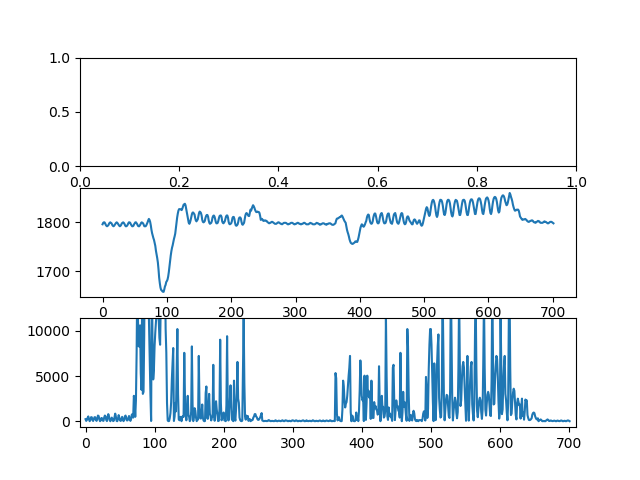

In [31]:
import statistics
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ndata = np.array(data)
w = 16
#var = [ statistics.variance(list(ndata[i:i+w])) for i in range(0, len(ndata)-w) ]
mean = [ statistics.mean(list(ndata[i:i+w])) for i in range(0, len(ndata)-w) ]
#ax1.plot(var)
ax2.plot(mean)
ax3.plot([
    (ndata[i] - statistics.mean(ndata[(i-w) - (i-w)%w : i - i%w]))**2 for i in range(w, len(ndata))
])

<IPython.core.display.Javascript object>


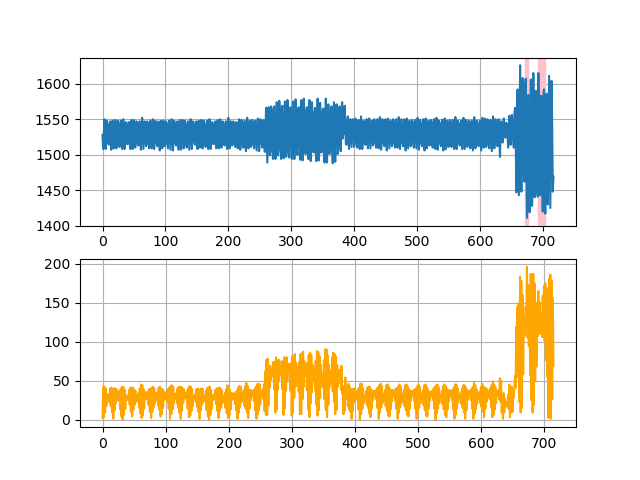

In [224]:
ndata = np.array(data)
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.grid()
ax2.grid()

offx = 2
width = 4
thr = 100

delta = np.abs(ndata[offx:] - ndata[:-offx])
for i in range(0, len(delta)-width):
    if (delta[i:i+width] > thr).all():
        ax1.axvline(x = i+width, color='pink', linewidth=1)
ax1.plot(ndata)
ax2.plot(delta, color='orange')
